<a href="https://colab.research.google.com/github/tombrash/handson-ml2/blob/master/workbooks%5Cch14%5Ccnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [38]:
dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

In [14]:
test_set = tfds.load("tf_flowers", split='train[:10%]', as_supervised=True)
valid_set = tfds.load('tf_flowers', split='train[10%:25%]', as_supervised=True)
train_set = tfds.load('tf_flowers', split='train[25%:]', as_supervised=True)


In [18]:
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224,224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [19]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [20]:
base_model = keras.applications.xception.Xception(weights='imagenet', 
                                                  include_top=False)
avg = layers.GlobalAveragePooling2D()(base_model.output)
output = layers.Dense(n_classes, activation='softmax')(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 2s 0us/step


In [21]:
for layer in base_model.layers:
  layer.trainable = False

In [22]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, 
              metrics = ['accuracy'])

In [23]:
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 16s 188ms/step - loss: 1.3357 - accuracy: 0.7976 - val_loss: 1.0102 - val_accuracy: 0.8312
Epoch 2/5
86/86 [==============================] - 15s 178ms/step - loss: 0.4495 - accuracy: 0.9077 - val_loss: 0.7853 - val_accuracy: 0.8693
Epoch 3/5
86/86 [==============================] - 15s 178ms/step - loss: 0.1911 - accuracy: 0.9430 - val_loss: 0.6975 - val_accuracy: 0.8639
Epoch 4/5
86/86 [==============================] - 15s 179ms/step - loss: 0.1088 - accuracy: 0.9673 - val_loss: 0.6607 - val_accuracy: 0.8748
Epoch 5/5
86/86 [==============================] - 15s 180ms/step - loss: 0.0711 - accuracy: 0.9775 - val_loss: 0.6424 - val_accuracy: 0.8675


In [24]:
for layer in base_model.layers:
  layer.trainable = True

  optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay = 0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                metrics = ['accuracy'])

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('fashion_mnist.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, 
                                                  restore_best_weights=True)
callbacks = [checkpoint_cb, early_stopping_cb]

In [26]:
history = model.fit(train_set, epochs=100, validation_data=valid_set, 
                    callbacks=callbacks)

Epoch 1/100
86/86 [==============================] - 65s 756ms/step - loss: 0.3782 - accuracy: 0.8779 - val_loss: 0.6882 - val_accuracy: 0.8512
Epoch 2/100
86/86 [==============================] - 66s 762ms/step - loss: 0.0652 - accuracy: 0.9782 - val_loss: 0.3358 - val_accuracy: 0.9147
Epoch 3/100
86/86 [==============================] - 66s 762ms/step - loss: 0.0220 - accuracy: 0.9945 - val_loss: 0.3423 - val_accuracy: 0.9074
Epoch 4/100
86/86 [==============================] - 66s 768ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.3456 - val_accuracy: 0.9183
Epoch 5/100
86/86 [==============================] - 66s 766ms/step - loss: 0.0108 - accuracy: 0.9956 - val_loss: 0.3823 - val_accuracy: 0.9147
Epoch 6/100
86/86 [==============================] - 66s 764ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.4335 - val_accuracy: 0.9147
Epoch 7/100
86/86 [==============================] - 66s 767ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.4240 - val_accuracy:

In [27]:
model.evaluate(test_set)

12/12 [==============================] - 2s 167ms/step - loss: 0.3682 - accuracy: 0.9101


[0.36817455291748047, 0.9100817441940308]

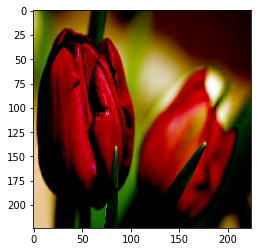

In [94]:
np_data = tfds.as_numpy(train_set)
im1 = next(np_data)
plt.imshow(im1[0][12]) # train_set defined in batches of 32, 
                      # this takes the features (0) and then
                      # a random image from the batch (12)